# Regression

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

%matplotlib inline

## Simple Linear Regression

In [2]:
x = np.array([5, 15, 25, 35, 45, 55]).reshape((-1, 1))
y = np.array([5, 20, 14, 32, 22, 38])

In [3]:
x, y

(array([[ 5],
        [15],
        [25],
        [35],
        [45],
        [55]]),
 array([ 5, 20, 14, 32, 22, 38]))

In [4]:
model = LinearRegression()

In [5]:
model.fit(x, y)

LinearRegression()

In [6]:
r_sq = model.score(x, y)
r_sq

0.7158756137479542

In [7]:
model.intercept_

5.633333333333329

In [8]:
model.coef_

array([0.54])

In [9]:
model.predict([[60]])

array([38.03333333])

In [10]:
y_pred = model.predict(x)
y_pred

array([ 8.33333333, 13.73333333, 19.13333333, 24.53333333, 29.93333333,
       35.33333333])

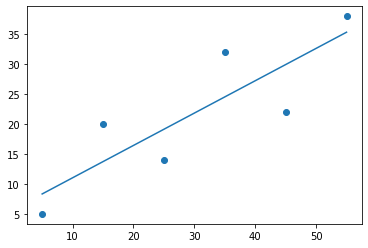

In [12]:
plt.scatter(x, y)
plt.plot(x, y_pred)

In [13]:
x_new = np.arange(5).reshape((-1, 1))
x_new

array([[0],
       [1],
       [2],
       [3],
       [4]])

In [14]:
model.predict(x_new)

array([5.63333333, 6.17333333, 6.71333333, 7.25333333, 7.79333333])

In [15]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y, y_pred)

33.75555555555555

## Multiple Linear Regression

In [16]:
import numpy as np
from sklearn.linear_model import LinearRegression

In [17]:
x = [[0, 1], [5, 1], [15, 2], [25, 5], [35, 11], [45, 15], [55, 34], [60, 35]]
y = [4, 5, 20, 14, 32, 22, 38, 43]
x, y = np.array(x), np.array(y)

In [18]:
x, y

(array([[ 0,  1],
        [ 5,  1],
        [15,  2],
        [25,  5],
        [35, 11],
        [45, 15],
        [55, 34],
        [60, 35]]),
 array([ 4,  5, 20, 14, 32, 22, 38, 43]))

In [19]:
model = LinearRegression()

In [20]:
model.fit(x, y)

LinearRegression()

In [21]:
r_sq = model.score(x, y)

In [22]:
print(r_sq)
print(model.intercept_)
print(model.coef_)

0.8615939258756775
5.52257927519819
[0.44706965 0.25502548]


In [23]:
model.predict([[20, 60]])

array([29.76550113])

In [24]:
x_new = np.arange(10).reshape((-1, 2))

In [25]:
model.predict(x_new)

array([ 5.77760476,  7.18179502,  8.58598528,  9.99017554, 11.3943658 ])

## Polynomial Regression

In [26]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [27]:
x = np.array([5, 15, 25, 35, 45, 55]).reshape((-1, 1))
y = np.array([15, 11, 2, 8, 25, 32])
x, y

(array([[ 5],
        [15],
        [25],
        [35],
        [45],
        [55]]),
 array([15, 11,  2,  8, 25, 32]))

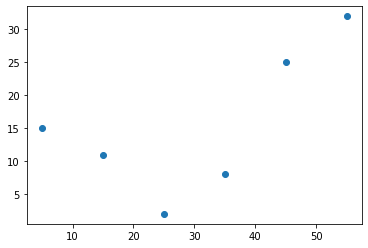

In [28]:
plt.scatter(x, y)

In [29]:
transformer = PolynomialFeatures(include_bias=False)

In [30]:
transformer.fit(x)

PolynomialFeatures(include_bias=False)

In [31]:
x_ = transformer.transform(x)

In [32]:
x_

array([[   5.,   25.],
       [  15.,  225.],
       [  25.,  625.],
       [  35., 1225.],
       [  45., 2025.],
       [  55., 3025.]])

In [33]:
model = LinearRegression()
model.fit(x_, y)

LinearRegression()

In [35]:
r_sq = model.score(x_, y)
r_sq

0.8908516262498563

In [36]:
y_pred = model.predict(x_)

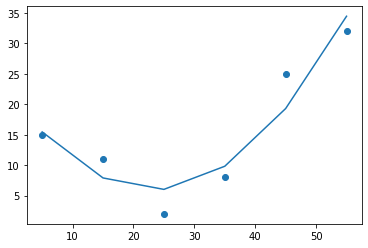

In [38]:
plt.scatter(x, y)
plt.plot(x, y_pred)

## Linear Regression on Real Dataset

In [48]:
import pandas as pd

In [40]:
from sklearn import datasets
data = datasets.load_boston()

In [47]:
print(data.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [49]:
df = pd.DataFrame(data.data, columns=data.feature_names)

target = pd.DataFrame(data.target, columns=['MEDV'])

In [50]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [51]:
target.head()

,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [52]:
X = df
y = target['MEDV']

In [55]:
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [56]:
model.score(X, y)

0.7406426641094094

In [58]:
model.predict([[0.0003, 17, 3.3, 0, 0.5, 6.7, 64, 4.5, 1.0, 296, 15, 396, 5]])

array([30.79092598])

### Example 2

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [60]:
df = pd.read_csv('https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/CarPrice_Assignment.csv',
                 usecols=['horsepower', 'price'])
df.head()

,horsepower,price
0,111,13495.0
1,111,16500.0
2,154,16500.0
3,102,13950.0
4,115,17450.0


In [61]:
df.shape

(205, 2)

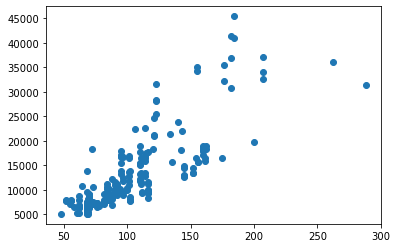

In [62]:
plt.scatter(df['horsepower'], df['price'])

In [63]:
df.corr()

,horsepower,price
horsepower,1.000000,0.808139
price,0.808139,1.000000


In [67]:
x = df['horsepower'].values.reshape(-1, 1)
y = df['price'].values.reshape(-1, 1)

In [68]:
x, y

(array([[111],
        [111],
        [154],
        [102],
        [115],
        [110],
        [110],
        [110],
        [140],
        [160],
        [101],
        [101],
        [121],
        [121],
        [121],
        [182],
        [182],
        [182],
        [ 48],
        [ 70],
        [ 70],
        [ 68],
        [ 68],
        [102],
        [ 68],
        [ 68],
        [ 68],
        [102],
        [ 88],
        [145],
        [ 58],
        [ 76],
        [ 60],
        [ 76],
        [ 76],
        [ 76],
        [ 76],
        [ 86],
        [ 86],
        [ 86],
        [ 86],
        [101],
        [100],
        [ 78],
        [ 70],
        [ 70],
        [ 90],
        [176],
        [176],
        [262],
        [ 68],
        [ 68],
        [ 68],
        [ 68],
        [ 68],
        [101],
        [101],
        [101],
        [135],
        [ 84],
        [ 84],
        [ 84],
        [ 84],
        [ 64],
        [ 84],
        [120],
        [ 

In [70]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [72]:
(x_train.shape, x_test.shape)

((164, 1), (41, 1))

In [73]:
model = LinearRegression()

In [74]:
model.fit(x_train, y_train)

LinearRegression()

In [75]:
model.score(x_test, y_test)

0.6281591097904626

In [76]:
y_pred = model.predict(x_test)

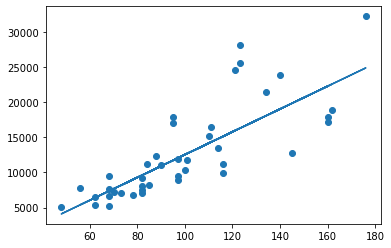

In [77]:
plt.scatter(x_test, y_test)
plt.plot(x_test, y_pred)

In [78]:
model.predict([[100]])

array([[12541.76662356]])